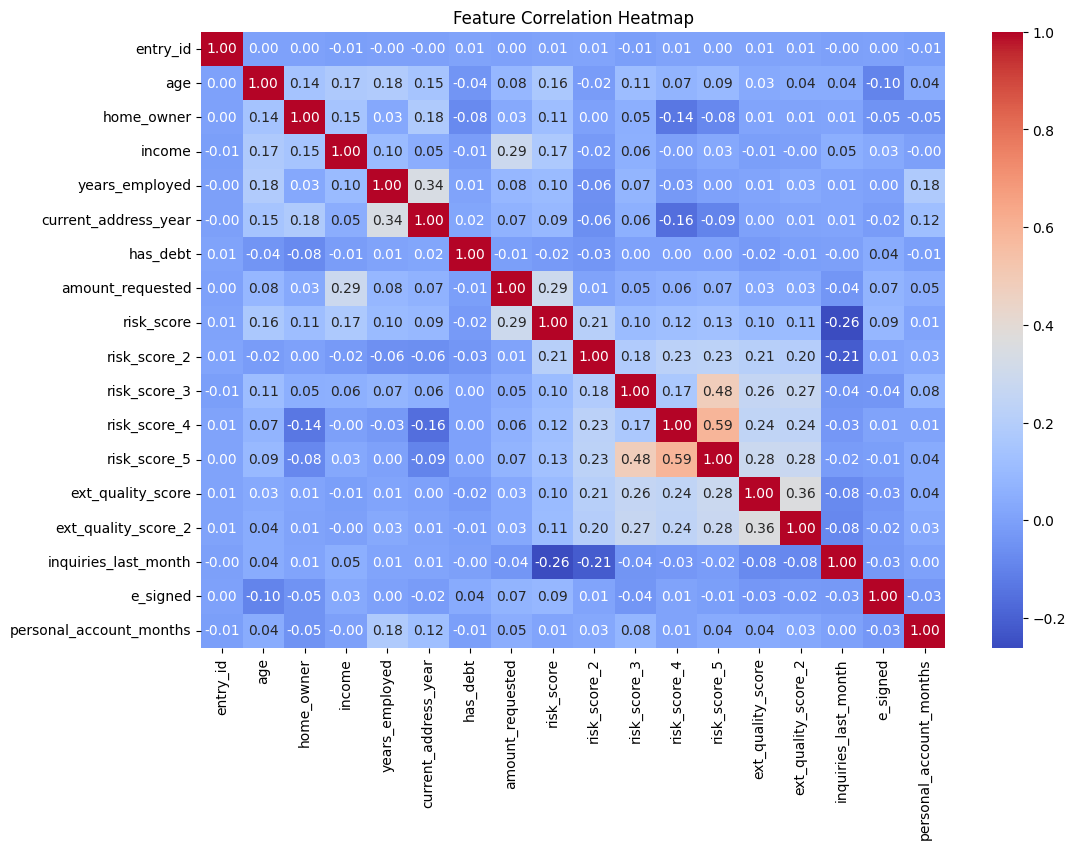

   entry_id  predicted_e_signed
0   7629673                   1
1   3560428                   0
2   6934997                   0
3   5682812                   1
4   5335819                   0


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
dataset = pd.read_csv('P39-Financial-Data (3).csv')

# Data Preprocessing Function
def preprocess_data(df):
    # Create 'personal_account_months' feature
    df['personal_account_months'] = df['personal_account_m'] + (df['personal_account_y'] * 12)
    # Drop unnecessary columns
    df = df.drop(columns=['pay_schedule', 'months_employed', 'personal_account_m', 'personal_account_y'])

    # Check for missing values and handle them if necessary
    if df.isnull().sum().any():
        df = df.fillna(df.mean())  # Simple example of filling NaNs with the mean

    return df

# Preprocess the data
dataset = preprocess_data(dataset)

# Heatmap of feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Separate features (X) and target (y), while keeping entry_id
X_full = dataset.drop(columns=['entry_id', 'e_signed'])
y_full = dataset['e_signed']
entry_ids = dataset['entry_id']

# Check if y_full is continuous and binarize if necessary
if y_full.dtype in ['float64', 'float32'] or len(y_full.unique()) > 2:
    y_full = (y_full > 0.5).astype(int)  # Example threshold at 0.5; adjust based on your data's distribution

# Feature Scaling
scaler = StandardScaler()
X_full_scaled = pd.DataFrame(scaler.fit_transform(X_full), columns=X_full.columns, index=X_full.index)

# Model Training and Prediction
rf_clf = RandomForestClassifier(random_state=0, n_estimators=100, criterion="entropy")
rf_clf.fit(X_full_scaled, y_full)

# Predict e_signed for the entire dataset
predictions = rf_clf.predict(X_full_scaled)

# Create final DataFrame with entry_id and predictions
final_predictions = pd.DataFrame({
    'entry_id': entry_ids,
    'predicted_e_signed': predictions
})

# Display the first few rows of the final predictions
print(final_predictions.head())

# Optionally, save the final predictions to a CSV file
final_predictions.to_csv('e_signed_predictions_full_dataset.csv', index=False)


